# 6.2 - L1 e L2

Para criar um modelo menos complexo (parcimonioso) quando você tem um grande número de recursos em seu conjunto de dados, algumas das técnicas de regularização usadas para lidar com o sobreajuste e seleção de recursos são:

1. **Regularização L1**: adiciona uma penalidade L1 que é igual ao valor absoluto da magnitude do coeficiente ou simplesmente restringe o tamanho dos coeficientes. Por exemplo, a regressão Lasso implementa este método.

2. **Regularização L2**: adiciona uma penalidade L2 que é igual ao quadrado da magnitude dos coeficientes. Por exemplo, a regressão Ridge e o SVM implementam este método.

## L1

É uma forma de seleção de recurso, porque quando atribuímos um recurso com peso 0, estamos multiplicando os valores do recurso por 0, que retorna 0, erradicando a importância desse recurso. Se os recursos de entrada de nosso modelo tivessem pesos próximos a 0, nossa norma L1 seria esparsa. Uma seleção dos recursos de entrada teria pesos iguais a zero e o resto seria diferente de zero.

Essencialmente, quando usamos a regularização L1, estamos penalizando o valor absoluto dos pesos.

Em ambientes do mundo real, geralmente temos recursos altamente correlacionados. Por exemplo, o ano em que nossa casa foi construída e o número de cômodos da casa podem ter uma alta correlação. Algo a se considerar ao usar a regularização L1 é que quando temos recursos altamente correlacionados, a norma L1 selecionaria apenas 1 dos recursos do grupo de recursos correlacionados de forma arbitrária, o que é algo que podemos não querer.

No entanto, para nosso problema de regressão de exemplo, a regressão Lasso (regressão linear com regularização L1) produziria um modelo que é altamente interpretável e usa apenas um subconjunto de recursos de entrada, reduzindo assim a complexidade do modelo.

### Python

Mean Squared Error: 34.709124595627884
Model Coefficients: [0.]



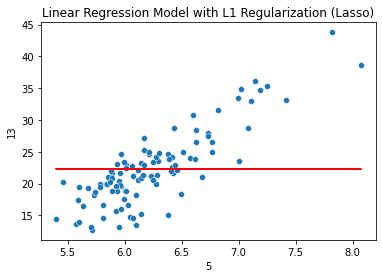

In [2]:
import warnings
warnings.filterwarnings("ignore")
 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
 
# Loading data
URL = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
df = pd.read_csv(URL, header=None)
 
# selecting a single feature
# using 100 instances for simplicity
X = df.loc[:100, 5]
y = df.loc[:100, 13] # target label 
 
# reshaping the data 
X_reshaped = X[:, np.newaxis]
y_reshaped = y[:, np.newaxis]
 
# instantiating the lasso regression model
lasso = Lasso(alpha=10)
 
# training the model
lasso.fit(X_reshaped, y_reshaped)
 
# making predictions 
y_pred = lasso.predict(X_reshaped)
 
# evaluating the model
mse = mean_squared_error(y_reshaped, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {lasso.coef_}\n")
 
# plotting the line of best fit
sns.scatterplot(X,y)
plt.plot(X_reshaped, y_pred, color="red")
plt.title("Linear Regression Model with L1 Regularization (Lasso)")
plt.show() 

## L2

A regularização L2, ou a norma L2, ou Ridge (em problemas de regressão), combate o sobreajuste forçando os pesos a serem pequenos, mas não tornando-os exatamente 0.

Portanto, se estamos prevendo os preços das casas novamente, isso significa que os recursos menos significativos para prever o preço da casa ainda teriam alguma influência sobre a previsão final, mas seria apenas uma pequena influência.

O termo de regularização que adicionamos à função de perda ao realizar a regularização L2 é a soma dos quadrados de todos os pesos dos recursos:

$$LossFunction=\frac{1}{N}\sum^{N}_{i=1}(\hat{Y}-Y)^2+\lambda \sum^{N}_{i=1}θ^2_i$$

Portanto, a regularização L2 retorna uma solução não esparsa, pois os pesos serão diferentes de zero (embora alguns possam estar próximos de 0).

Um grande obstáculo a considerar ao usar a regularização L2 é que ela não é robusta para outliers. Os termos quadrados explodirão as diferenças no erro dos outliers. A regularização tentaria corrigir isso penalizando os pesos.

### Python

Mean Squared Error: 25.96309109305436
Model Coefficients: [[1.98542524]]



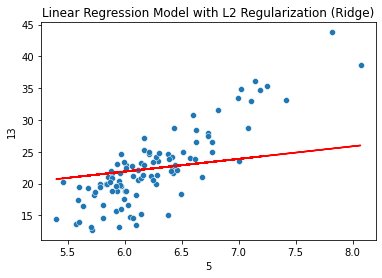

In [3]:
ridge = Ridge(alpha=100)
ridge.fit(X_reshaped, y_reshaped)
y_pred = ridge.predict(X_reshaped)
 
mse = mean_squared_error(y_reshaped, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {ridge.coef_}\n")
 
sns.scatterplot(X,y)
plt.plot(X_reshaped, y_pred, color="red")
plt.title("Linear Regression Model with L2 Regularization (Ridge)")
plt.show() 


As diferenças entre a regularização L1 e L2:
* A regularização L1 penaliza a soma dos valores absolutos dos pesos, enquanto a regularização L2 penaliza a soma dos quadrados dos pesos.
* A solução de regularização L1 é esparsa. A solução de regularização L2 não é esparsa.
* A regularização L2 não realiza a seleção de recursos, uma vez que os pesos são reduzidos apenas para valores próximos a 0 em vez de 0. A regularização L1 tem seleção de recursos embutida.
* A regularização L1 é robusta para outliers, a regularização L2 não.